# Source Visualization in Correlations

In [1]:
import os
import mne
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

from toolbox.estimate_source import SourceEstimator, get_stuff
from get_epochs import get_all_epochs

## Setup Freesurfer Environ Variables

In [2]:
if not '__file__' in dir():
    __file__ = os.path.join(os.path.abspath(''), '__fake__file__')
    
def set_freesurfer_environ():
    freesurfer_folder = os.path.join(os.path.dirname(__file__),
                                     '_link_freesurfer')
    mne.utils.set_config('SUBJECTS_DIR',
                         os.path.join(freesurfer_folder, 'subjects'))


set_freesurfer_environ()

## Compute Source Estimation

In [5]:
# Settings
subject_name = 'MEG_S02'
freesurfer_name = 'RSVP_MRI_S02'

# Compute source estimation
# Read epochs and formulate evoked
epochs = get_all_epochs(subject_name)['1']
evoked = epochs.average()
epochs, evoked

# Prepare parameters
subject_folder = os.path.join(os.path.dirname(__file__),
                              '_link_preprocessed', subject_name)

# Get stuff for source estimation


def stuff_path(name, freesurfer_name=freesurfer_name, folder=subject_folder):
    return os.path.join(folder, f'{freesurfer_name}-{name}.fif')


src = get_stuff('src', stuff_path('src'))
bem = get_stuff('bem', stuff_path('bem'))
sol = get_stuff('bem-sol', stuff_path('bem-sol'))
trans = get_stuff('trans', stuff_path('trans'))

# Init estimator
srcEst = SourceEstimator(freesurfer_name)
srcEst.pre_estimation(src, sol, trans, epochs, epochs.info)

# Source estimation
# stc, morph = srcEst.estimate(evoked)
# stc_morph = morph.apply(stc)
stcs, _ = srcEst.estimate(epochs)


Reading _link_epochs/MEG_S02/block_03-epo.fif ...
    Found the data of interest:
        t =    -200.00 ...    1200.00 ms
        0 CTF compensation matrices available
Not setting metadata
Not setting metadata
40 matching events found
No baseline correction applied
0 projection items activated
Reading _link_epochs/MEG_S02/block_04-epo.fif ...
    Found the data of interest:
        t =    -200.00 ...    1200.00 ms
        0 CTF compensation matrices available
Not setting metadata
Not setting metadata
1448 matching events found
No baseline correction applied
0 projection items activated
Reading _link_epochs/MEG_S02/block_05-epo.fif ...
    Found the data of interest:
        t =    -200.00 ...    1200.00 ms
        0 CTF compensation matrices available
Not setting metadata
Not setting metadata
1442 matching events found
No baseline correction applied
0 projection items activated
Reading _link_epochs/MEG_S02/block_06-epo.fif ...
    Found the data of interest:
        t =    -200.00 ...

[Parallel(n_jobs=48)]: Using backend LokyBackend with 48 concurrent workers.
[Parallel(n_jobs=48)]: Done  11 out of  48 | elapsed:    0.1s remaining:    0.4s
[Parallel(n_jobs=48)]: Done  21 out of  48 | elapsed:    0.2s remaining:    0.2s
[Parallel(n_jobs=48)]: Done  31 out of  48 | elapsed:    0.2s remaining:    0.1s


    Skipping interior check for 891 sources that fit inside a sphere of radius   45.8 mm
    Skipping solid angle check for 0 points using Qhull


[Parallel(n_jobs=48)]: Done  41 out of  48 | elapsed:    0.2s remaining:    0.0s
[Parallel(n_jobs=48)]: Done  48 out of  48 | elapsed:    0.2s finished
[Parallel(n_jobs=48)]: Using backend LokyBackend with 48 concurrent workers.
[Parallel(n_jobs=48)]: Done  11 out of  48 | elapsed:    0.1s remaining:    0.5s



Setting up compensation data...
    No compensation set. Nothing more to do.

Composing the field computation matrix...


[Parallel(n_jobs=48)]: Done  21 out of  48 | elapsed:    0.2s remaining:    0.2s
[Parallel(n_jobs=48)]: Done  31 out of  48 | elapsed:    0.2s remaining:    0.1s
[Parallel(n_jobs=48)]: Done  41 out of  48 | elapsed:    0.2s remaining:    0.0s
[Parallel(n_jobs=48)]: Done  48 out of  48 | elapsed:    0.3s finished
[Parallel(n_jobs=48)]: Using backend LokyBackend with 48 concurrent workers.
[Parallel(n_jobs=48)]: Done  11 out of  48 | elapsed:    0.6s remaining:    2.0s
[Parallel(n_jobs=48)]: Done  21 out of  48 | elapsed:    0.7s remaining:    0.9s
[Parallel(n_jobs=48)]: Done  31 out of  48 | elapsed:    0.7s remaining:    0.4s
[Parallel(n_jobs=48)]: Done  41 out of  48 | elapsed:    0.8s remaining:    0.1s
[Parallel(n_jobs=48)]: Done  48 out of  48 | elapsed:    0.8s finished
[Parallel(n_jobs=48)]: Using backend LokyBackend with 48 concurrent workers.
[Parallel(n_jobs=48)]: Done  11 out of  48 | elapsed:    0.7s remaining:    2.4s
[Parallel(n_jobs=48)]: Done  21 out of  48 | elapsed:   

Computing MEG at 8196 source locations (free orientations)...


[Parallel(n_jobs=48)]: Done  48 out of  48 | elapsed:    0.6s finished
[Parallel(n_jobs=48)]: Using backend LokyBackend with 48 concurrent workers.
[Parallel(n_jobs=48)]: Done  11 out of  48 | elapsed:    2.5s remaining:    8.4s
[Parallel(n_jobs=48)]: Done  21 out of  48 | elapsed:    4.4s remaining:    5.7s
[Parallel(n_jobs=48)]: Done  31 out of  48 | elapsed:    6.3s remaining:    3.4s
[Parallel(n_jobs=48)]: Done  41 out of  48 | elapsed:    8.1s remaining:    1.4s
[Parallel(n_jobs=48)]: Done  48 out of  48 | elapsed:    9.3s finished
[Parallel(n_jobs=48)]: Using backend LokyBackend with 48 concurrent workers.
[Parallel(n_jobs=48)]: Done  11 out of  48 | elapsed:    0.2s remaining:    0.8s
[Parallel(n_jobs=48)]: Done  21 out of  48 | elapsed:    0.3s remaining:    0.3s
[Parallel(n_jobs=48)]: Done  31 out of  48 | elapsed:    0.3s remaining:    0.1s
[Parallel(n_jobs=48)]: Done  41 out of  48 | elapsed:    0.3s remaining:    0.0s
[Parallel(n_jobs=48)]: Done  48 out of  48 | elapsed:   


Finished.
Got ['tmax', 'method', 'n_jobs'] from params
Computing rank from data with rank=None
    Using tolerance 6.1e-09 (2.2e-16 eps * 272 dim * 1e+05  max singular value)
    Estimated rank (mag): 272
    MAG: rank 272 computed from 272 data channels with 0 projectors
Reducing data rank from 272 -> 272
Estimating covariance using EMPIRICAL
Done.
Number of samples used : 9765
[done]
Got ['loose', 'depth'] from params
Converting forward solution to surface orientation
    Average patch normals will be employed in the rotation to the local surface coordinates....
    Converting to surface-based source orientations...
    [done]
Computing inverse operator with 272 channels.
    272 out of 272 channels remain after picking
Selected 272 channels
Creating the depth weighting matrix...
    272 magnetometer or axial gradiometer channels
    limit = 5809/8196 = 10.001598
    scale = 1.24636e-09 exp = 0.8
Applying loose dipole orientations to surface source spaces: 0.2
Whitening the forward 

## Viualize Envolope Correlation between Labels

In [6]:
# Extract label_ts in subject's space
labels = mne.read_labels_from_annot(freesurfer_name, 'aparc')
label_ts = mne.extract_label_time_course(stcs, labels, src, mode='mean_flip', return_generator=False)
corr = mne.connectivity.envelope_correlation(label_ts, verbose=True)

Reading labels from parcellation...
   read 34 labels from /home/zcc/Documents/zcc_meg_toolbox/V4.0/_link_freesurfer/subjects/RSVP_MRI_S02/label/lh.aparc.annot
   read 34 labels from /home/zcc/Documents/zcc_meg_toolbox/V4.0/_link_freesurfer/subjects/RSVP_MRI_S02/label/rh.aparc.annot
Extracting time courses for 68 labels (mode: mean_flip)
Extracting time courses for 68 labels (mode: mean_flip)
Extracting time courses for 68 labels (mode: mean_flip)
Extracting time courses for 68 labels (mode: mean_flip)
Extracting time courses for 68 labels (mode: mean_flip)
Extracting time courses for 68 labels (mode: mean_flip)
Extracting time courses for 68 labels (mode: mean_flip)
Extracting time courses for 68 labels (mode: mean_flip)
Extracting time courses for 68 labels (mode: mean_flip)
Extracting time courses for 68 labels (mode: mean_flip)
Extracting time courses for 68 labels (mode: mean_flip)
Extracting time courses for 68 labels (mode: mean_flip)
Extracting time courses for 68 labels (mode:

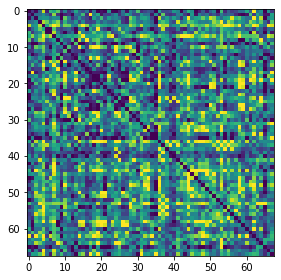

In [7]:
# let's plot this matrix
fig, ax = plt.subplots(figsize=(4, 4))
ax.imshow(corr, cmap='viridis', clim=np.percentile(corr, [5, 95]))
fig.tight_layout()

## Visualize Full Spectral Connection in Cycle Graph

In [8]:
fmin, fmax = 7.5, 40.0
subjects_dir = mne.utils.get_config('SUBJECTS_DIR')

_label_ts = [np.abs(e) for e in label_ts]
con, freqs, times, n_epochs, n_tapers = mne.connectivity.spectral_connectivity(
    _label_ts, method='pli', mode='multitaper', sfreq=epochs.info['sfreq'],
    fmin=fmin, fmax=fmax, mt_adaptive=True, n_jobs=48)

# We create a list of Label containing also the sub structures
labels_aseg = mne.get_volume_labels_from_src(src, freesurfer_name, subjects_dir)
labels = labels + labels_aseg

# read colors
node_colors = [label.color for label in labels]

# We reorder the labels based on their location in the left hemi
label_names = [label.name for label in labels]
lh_labels = [name for name in label_names if name.endswith('lh')]
rh_labels = [name for name in label_names if name.endswith('rh')]

# Get the y-location of the label
label_ypos_lh = list()
for name in lh_labels:
    idx = label_names.index(name)
    ypos = np.mean(labels[idx].pos[:, 1])
    label_ypos_lh.append(ypos)
try:
    idx = label_names.index('Brain-Stem')
except ValueError:
    pass
else:
    ypos = np.mean(labels[idx].pos[:, 1])
    lh_labels.append('Brain-Stem')
    label_ypos_lh.append(ypos)


# Reorder the labels based on their location
lh_labels = [label for (yp, label) in sorted(zip(label_ypos_lh, lh_labels))]

# For the right hemi
rh_labels = [label[:-2] + 'rh' for label in lh_labels
             if label != 'Brain-Stem' and label[:-2] + 'rh' in rh_labels]

# Save the plot order
node_order = lh_labels[::-1] + rh_labels

node_angles = mne.viz.circular_layout(label_names, node_order, start_pos=90,
                              group_boundaries=[0, len(label_names) // 2])

Connectivity computation...
only using indices for lower-triangular matrix
    computing connectivity for 2278 connections
    using t=0.000s..1.400s for estimation (141 points)
    frequencies: 7.8Hz..39.7Hz (46 points)
    Using multitaper spectrum estimation with 7 DPSS windows
    the following metrics will be computed: PLI
    computing connectivity for epochs 1..48


[Parallel(n_jobs=48)]: Using backend LokyBackend with 48 concurrent workers.


    computing connectivity for epochs 49..96


[Parallel(n_jobs=48)]: Done  11 out of  48 | elapsed:    0.2s remaining:    0.7s
[Parallel(n_jobs=48)]: Done  21 out of  48 | elapsed:    0.2s remaining:    0.3s
[Parallel(n_jobs=48)]: Done  31 out of  48 | elapsed:    0.3s remaining:    0.1s
[Parallel(n_jobs=48)]: Done  41 out of  48 | elapsed:    0.3s remaining:    0.0s
[Parallel(n_jobs=48)]: Done  48 out of  48 | elapsed:    0.3s finished
[Parallel(n_jobs=48)]: Using backend LokyBackend with 48 concurrent workers.


    computing connectivity for epochs 97..144


[Parallel(n_jobs=48)]: Done  11 out of  48 | elapsed:    0.2s remaining:    0.7s
[Parallel(n_jobs=48)]: Done  21 out of  48 | elapsed:    0.2s remaining:    0.3s
[Parallel(n_jobs=48)]: Done  31 out of  48 | elapsed:    0.2s remaining:    0.1s
[Parallel(n_jobs=48)]: Done  41 out of  48 | elapsed:    0.3s remaining:    0.0s
[Parallel(n_jobs=48)]: Done  48 out of  48 | elapsed:    0.3s finished
[Parallel(n_jobs=48)]: Using backend LokyBackend with 48 concurrent workers.


    computing connectivity for epochs 145..192


[Parallel(n_jobs=48)]: Done  11 out of  48 | elapsed:    0.2s remaining:    0.5s
[Parallel(n_jobs=48)]: Done  21 out of  48 | elapsed:    0.2s remaining:    0.3s
[Parallel(n_jobs=48)]: Done  31 out of  48 | elapsed:    0.2s remaining:    0.1s
[Parallel(n_jobs=48)]: Done  41 out of  48 | elapsed:    0.3s remaining:    0.0s
[Parallel(n_jobs=48)]: Done  48 out of  48 | elapsed:    0.3s finished
[Parallel(n_jobs=48)]: Using backend LokyBackend with 48 concurrent workers.


    computing connectivity for epochs 193..240


[Parallel(n_jobs=48)]: Done  11 out of  48 | elapsed:    0.2s remaining:    0.6s
[Parallel(n_jobs=48)]: Done  21 out of  48 | elapsed:    0.2s remaining:    0.3s
[Parallel(n_jobs=48)]: Done  31 out of  48 | elapsed:    0.2s remaining:    0.1s
[Parallel(n_jobs=48)]: Done  41 out of  48 | elapsed:    0.3s remaining:    0.0s
[Parallel(n_jobs=48)]: Done  48 out of  48 | elapsed:    0.3s finished
[Parallel(n_jobs=48)]: Using backend LokyBackend with 48 concurrent workers.


    computing connectivity for epochs 241..288


[Parallel(n_jobs=48)]: Done  11 out of  48 | elapsed:    0.2s remaining:    0.6s
[Parallel(n_jobs=48)]: Done  21 out of  48 | elapsed:    0.2s remaining:    0.3s
[Parallel(n_jobs=48)]: Done  31 out of  48 | elapsed:    0.2s remaining:    0.1s
[Parallel(n_jobs=48)]: Done  41 out of  48 | elapsed:    0.3s remaining:    0.0s
[Parallel(n_jobs=48)]: Done  48 out of  48 | elapsed:    0.3s finished
[Parallel(n_jobs=48)]: Using backend LokyBackend with 48 concurrent workers.


    computing connectivity for epochs 289..336


[Parallel(n_jobs=48)]: Done  11 out of  48 | elapsed:    0.2s remaining:    0.6s
[Parallel(n_jobs=48)]: Done  21 out of  48 | elapsed:    0.2s remaining:    0.3s
[Parallel(n_jobs=48)]: Done  31 out of  48 | elapsed:    0.2s remaining:    0.1s
[Parallel(n_jobs=48)]: Done  41 out of  48 | elapsed:    0.3s remaining:    0.0s
[Parallel(n_jobs=48)]: Done  48 out of  48 | elapsed:    0.3s finished
[Parallel(n_jobs=48)]: Using backend LokyBackend with 48 concurrent workers.


    computing connectivity for epochs 337..384


[Parallel(n_jobs=48)]: Done  11 out of  48 | elapsed:    0.2s remaining:    0.7s
[Parallel(n_jobs=48)]: Done  21 out of  48 | elapsed:    0.2s remaining:    0.3s
[Parallel(n_jobs=48)]: Done  31 out of  48 | elapsed:    0.3s remaining:    0.1s
[Parallel(n_jobs=48)]: Done  41 out of  48 | elapsed:    0.3s remaining:    0.0s
[Parallel(n_jobs=48)]: Done  48 out of  48 | elapsed:    0.3s finished
[Parallel(n_jobs=48)]: Using backend LokyBackend with 48 concurrent workers.


    computing connectivity for epochs 385..432


[Parallel(n_jobs=48)]: Done  11 out of  48 | elapsed:    0.1s remaining:    0.4s
[Parallel(n_jobs=48)]: Done  21 out of  48 | elapsed:    0.2s remaining:    0.3s
[Parallel(n_jobs=48)]: Done  31 out of  48 | elapsed:    0.2s remaining:    0.1s
[Parallel(n_jobs=48)]: Done  41 out of  48 | elapsed:    0.2s remaining:    0.0s
[Parallel(n_jobs=48)]: Done  48 out of  48 | elapsed:    0.3s finished
[Parallel(n_jobs=48)]: Using backend LokyBackend with 48 concurrent workers.


    computing connectivity for epochs 433..465


[Parallel(n_jobs=48)]: Done  11 out of  48 | elapsed:    0.2s remaining:    0.6s
[Parallel(n_jobs=48)]: Done  21 out of  48 | elapsed:    0.2s remaining:    0.3s
[Parallel(n_jobs=48)]: Done  31 out of  48 | elapsed:    0.3s remaining:    0.1s
[Parallel(n_jobs=48)]: Done  41 out of  48 | elapsed:    0.3s remaining:    0.0s
[Parallel(n_jobs=48)]: Done  48 out of  48 | elapsed:    0.3s finished
[Parallel(n_jobs=48)]: Using backend LokyBackend with 48 concurrent workers.


    assembling connectivity matrix (filling the upper triangular region of the matrix)
[Connectivity computation done]


[Parallel(n_jobs=48)]: Done   7 out of  33 | elapsed:    0.1s remaining:    0.4s
[Parallel(n_jobs=48)]: Done  14 out of  33 | elapsed:    0.2s remaining:    0.2s
[Parallel(n_jobs=48)]: Done  21 out of  33 | elapsed:    0.2s remaining:    0.1s
[Parallel(n_jobs=48)]: Done  28 out of  33 | elapsed:    0.2s remaining:    0.0s
[Parallel(n_jobs=48)]: Done  33 out of  33 | elapsed:    0.2s finished


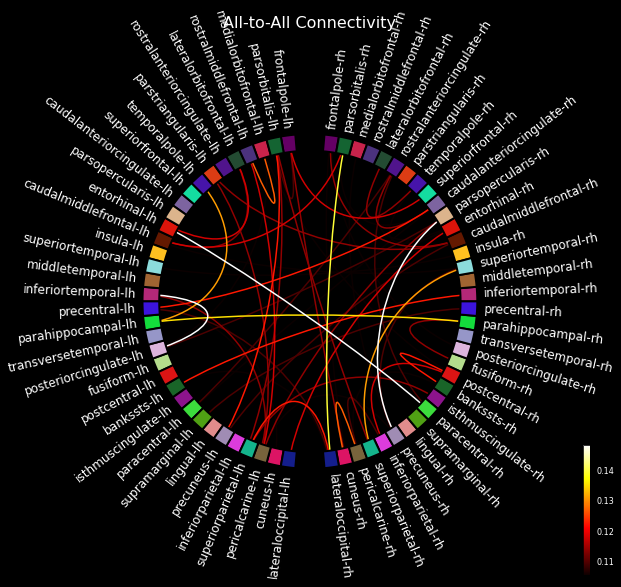

(<Figure size 864x864 with 2 Axes>,
 <PolarAxesSubplot:title={'center':'All-to-All Connectivity'}>)

In [9]:
# Plot the graph using node colors from the FreeSurfer parcellation. We only
# show the 300 strongest connections.
conmat = con[:, :, 0]
fig = plt.figure(num=None, figsize=(12, 12), facecolor='black')
mne.viz.plot_connectivity_circle(conmat, label_names, n_lines=50,
                         node_angles=node_angles, node_colors=node_colors,
                         title='All-to-All Connectivity',
                         fontsize_title=16,
                         fontsize_names=12,
                         fig=fig)